In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
df.shape

(10000, 50)

In [4]:
#Set result rows and columns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

#Removing irrelevant columns and columns with more than 5 categorical levels
clean_df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'TimeZone', 'Job','Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis = 1)
clean_df

,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,Urban,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110
1,Urban,1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,Urban,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961
3,Suburban,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412
4,Suburban,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,3,23,55723.74,Married,Male,No,9.415935,12,2,0,No,Month-to-month,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601
9996,Rural,4,48,34129.34,Divorced,Male,No,6.740547,15,2,0,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810
9997,Rural,1,48,45983.43,Never Married,Female,No,6.590911,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799
9998,Urban,1,39,16667.58,Separated,Male,No,12.071910,14,1,0,No,Two Year,No,Yes,Fiber Optic,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.624000,6468.456752


In [5]:
df.isna().values.any()

False

In [6]:
df.isnull().values.any()

False

In [7]:
#Check Area categories
df["Area"].value_counts()

Suburban    3346
Urban       3327
Rural       3327
Name: Area, dtype: int64

In [8]:
#Check Marital categories
df["Marital"].value_counts()

Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64

In [9]:
#Check PaymentMethod categories
df["PaymentMethod"].value_counts()

Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64

In [10]:
#Check Contract categories
df["Contract"].value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

In [11]:
#Check InternetService categories
df["InternetService"].value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

In [12]:
#Check Gender categories
df["Gender"].value_counts()

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64

In [13]:
#Convert Area, Marital, PaymentMethod, Gender and the remaining columns with "Yes" and "No" to numbers
convert_df = {"Area":     {"Rural": 0, "Suburban": 1, "Urban": 2},
              "Marital": {"Divorced": 0, "Married": 1, "Never Married": 2, "Separated": 3, "Widowed": 4},
              "PaymentMethod": {"Bank Transfer(automatic)": 0, "Credit Card (automatic)": 1, "Electronic Check": 2,  "Mailed Check": 3},
              "Gender": {"Female": 0, "Male": 1, "Nonbinary": 2},
              "Contract": {"Month-to-month": 0, "One year": 1, "Two Year": 2},
              "InternetService": {"DSL": 0, "Fiber Optic": 1, "None": 2},
              "Churn": {"No": 0, "Yes": 1},
              "Techie": {"No": 0, "Yes": 1},
              "Port_modem": {"No": 0, "Yes": 1},
              "Tablet": {"No": 0, "Yes": 1},
              "PaperlessBilling": {"No": 0, "Yes": 1},
              "Phone": {"No": 0, "Yes": 1},
              "Multiple": {"No": 0, "Yes": 1},
              "OnlineSecurity": {"No": 0, "Yes": 1},
              "OnlineBackup": {"No": 0, "Yes": 1},
              "DeviceProtection": {"No": 0, "Yes": 1},
              "TechSupport": {"No": 0, "Yes": 1},
              "StreamingTV": {"No": 0, "Yes": 1},
              "StreamingMovies": {"No": 0, "Yes": 1}}

In [14]:
converted_df = clean_df.replace(convert_df)
converted_df.head()

,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,2,0,68,28561.99,4,1,0,7.978323,10,0,1,0,1,1,1,1,1,0,1,1,0,0,0,1,1,1,6.795513,172.455519,904.536110
1,2,1,27,21704.77,1,0,1,11.699080,12,0,1,1,0,0,1,1,1,1,1,0,0,0,1,1,1,0,1.156681,242.632554,800.982766
2,2,4,50,9609.57,4,0,0,10.752800,9,0,1,1,2,1,0,0,1,1,0,0,0,0,0,1,1,1,15.754144,159.947583,2054.706961
3,1,1,48,18925.23,1,1,0,14.913540,15,2,0,1,2,0,0,0,1,0,1,0,0,0,1,0,1,3,17.087227,119.956840,2164.579412
4,1,0,83,40074.19,3,1,1,8.147417,16,2,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,3,1.670972,149.948316,271.493436


In [15]:
converted_df.dtypes

Area                      int64
Children                  int64
Age                       int64
Income                  float64
Marital                   int64
Gender                    int64
Churn                     int64
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                    int64
Contract                  int64
Port_modem                int64
Tablet                    int64
InternetService           int64
Phone                     int64
Multiple                  int64
OnlineSecurity            int64
OnlineBackup              int64
DeviceProtection          int64
TechSupport               int64
StreamingTV               int64
StreamingMovies           int64
PaperlessBilling          int64
PaymentMethod             int64
Tenure                  float64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
dtype: object

In [16]:
# get the summary
converted_df.describe()

,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.000000,2.0877,53.078400,39806.926771,1.99730,0.52060,0.265000,10.001848,12.016000,0.994200,0.398000,0.167900,0.698600,0.483400,0.299100,0.866600,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000,0.588200,1.57490,34.526188,172.624816,3392.341550
std,0.815761,2.1472,20.698882,28199.916702,1.42839,0.54388,0.441355,2.976019,3.025898,0.988466,0.635953,0.373796,0.836079,0.499749,0.457887,0.735839,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904,0.492184,1.07159,26.443063,42.943094,2185.294852
min,0.000000,0.0000,18.000000,348.670000,0.00000,0.00000,0.000000,0.099747,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000259,79.978860,155.506715
25%,0.000000,0.0000,35.000000,19224.717500,1.00000,0.00000,0.000000,8.018214,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,7.917694,139.979239,1236.470827
50%,1.000000,1.0000,53.000000,33170.605000,2.00000,0.00000,0.000000,10.018560,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.00000,35.430507,167.484700,3279.536903
75%,2.000000,3.0000,71.000000,53246.170000,3.00000,1.00000,1.000000,11.969485,14.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.00000,61.479795,200.734725,5586.141370
max,2.000000,10.0000,89.000000,258900.700000,4.00000,2.00000,1.000000,21.207230,23.000000,7.000000,6.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.00000,71.999280,290.160419,7158.981530


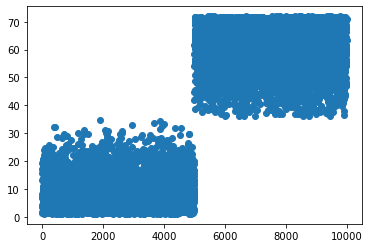

In [17]:
plt.scatter(converted_df.index, converted_df["Tenure"])
plt.rcParams["figure.figsize"]=(20,10)
plt.show()

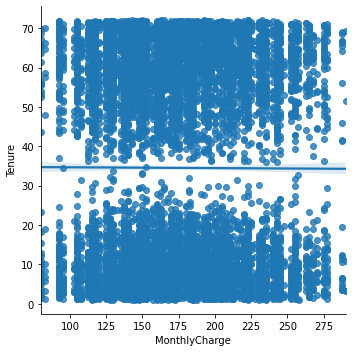

In [18]:
sns.lmplot(x='MonthlyCharge', y='Tenure', data=converted_df)

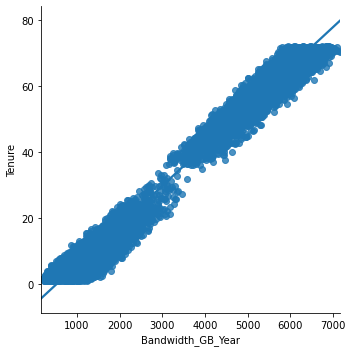

In [19]:
sns.lmplot(x='Bandwidth_GB_Year', y='Tenure', data=converted_df)

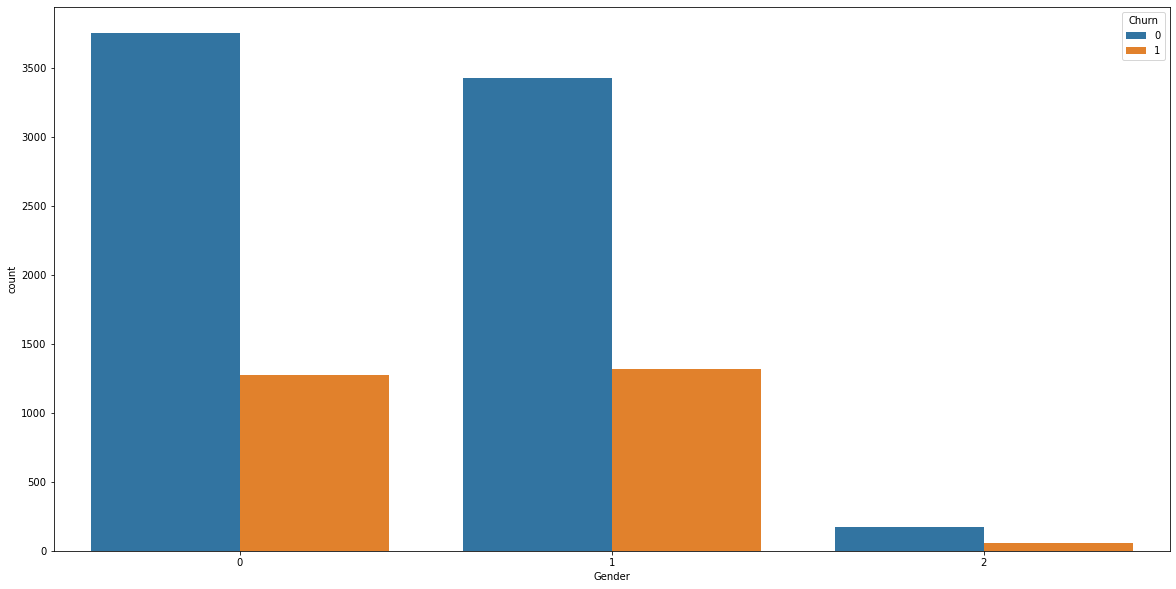

In [20]:
sns.countplot(x= 'Gender', hue='Churn', data=converted_df )

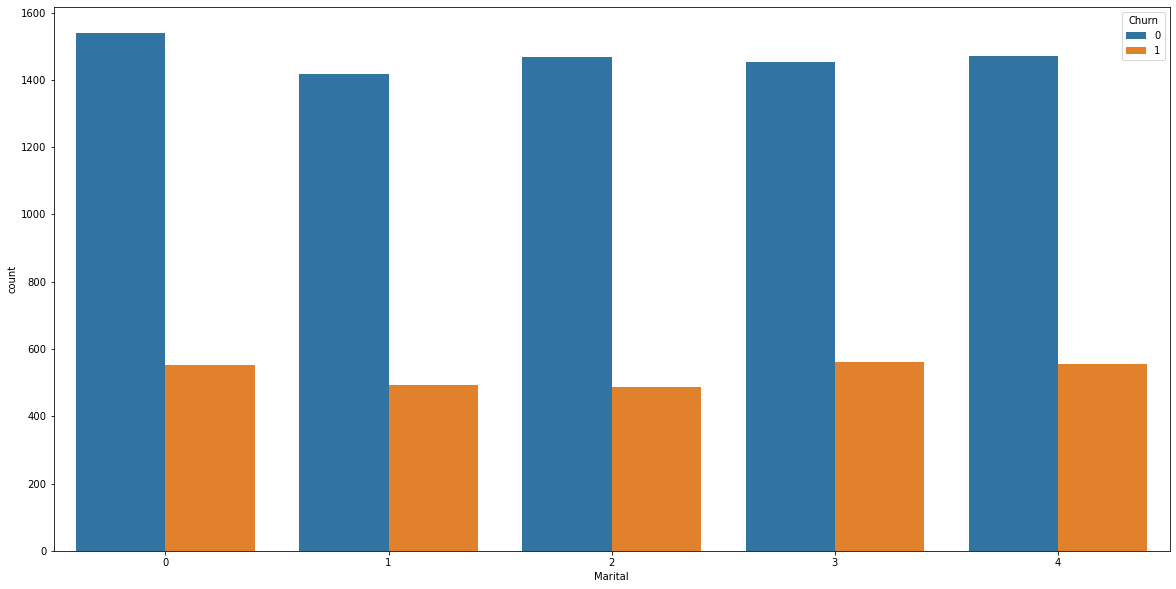

In [21]:
sns.countplot(x= 'Marital', hue='Churn', data=converted_df )

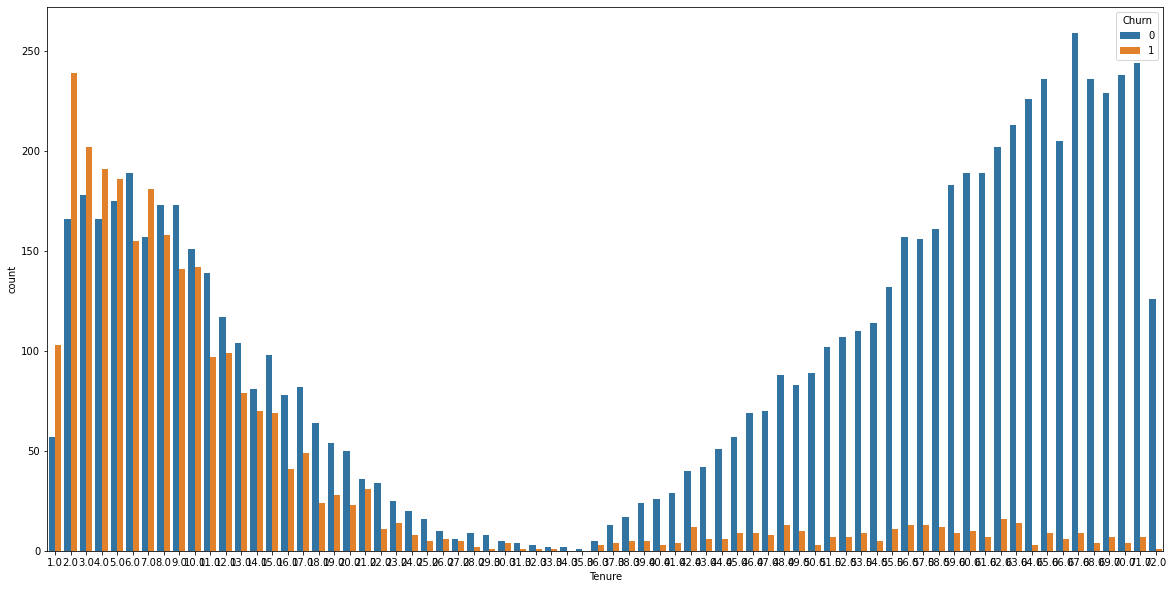

In [22]:
#round all numerical values temporarily to show a better Tenure value
round_df = converted_df.round()
sns.countplot(x= 'Tenure', hue='Churn', data=round_df )

In [23]:
#saves our dataframe into a csv file named final_churn_clean
converted_df.to_csv('final_churn_clean.csv')

In [24]:
#initial multiple regression model

initial_x = converted_df.drop('Tenure', axis = 1)
initial_y = converted_df[['Tenure']]

# split it into test and train variables with 20% for test
X_train, X_test, y_train, y_test = train_test_split(initial_x, initial_y, test_size=0.20, random_state=1)

# create a Linear Regression model object
initial_regression_model = LinearRegression()

# pass through the X_train & y_train data set
initial_regression_model.fit(X_train, y_train)


LinearRegression()

In [25]:
# grab the coefficient of our model and the intercept
intercept = initial_regression_model.intercept_[0]
coefficent = initial_regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*50)

# loop through the dictionary and print the data
for coef in zip(initial_x.columns, initial_regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -10.91
--------------------------------------------------
The Coefficient for Area is -0.0054
The Coefficient for Children is -0.38
The Coefficient for Age is 0.04
The Coefficient for Income is -1.5e-08
The Coefficient for Marital is 0.0093
The Coefficient for Gender is -0.53
The Coefficient for Churn is -0.49
The Coefficient for Outage_sec_perweek is 0.00011
The Coefficient for Email is 0.00093
The Coefficient for Contacts is 0.0049
The Coefficient for Yearly_equip_failure is 0.0067
The Coefficient for Techie is -0.0095
The Coefficient for Contract is -0.072
The Coefficient for Port_modem is 0.017
The Coefficient for Tablet is 0.0071
The Coefficient for InternetService is 3.0
The Coefficient for Phone is 0.012
The Coefficient for Multiple is -2.6
The Coefficient for OnlineSecurity is -1.1
The Coefficient for OnlineBackup is -2.3
The Coefficient for DeviceProtection is -1.7
The Coefficient for TechSupport is -0.74
The Coefficient for StreamingTV is -5.0
T

In [26]:
#define our intput
X2 = sm.add_constant(initial_x)

#create an OLS model
model = sm.OLS(initial_y, X2)

#fit the data
est = model.fit()

In [27]:
# print out a summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.593e+05
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:02:33   Log-Likelihood:                -13979.
No. Observations:               10000   AIC:                         2.802e+04
Df Residuals:                    9971   BIC:                         2.822e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -10.8218 

In [28]:
corr = converted_df.corr()
display(corr)

,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
Area,1.000000,-0.007879,0.011745,0.002557,0.013733,0.004057,0.014166,0.000239,-0.003444,0.000744,-0.006554,-0.001312,-0.005132,-0.009322,0.010710,-0.001166,-0.013488,0.004673,-0.005627,0.012073,0.010623,0.008863,-0.007847,0.001471,0.011956,-0.016818,-0.016615,0.003951,-0.016575
Children,-0.007879,1.000000,-0.029732,0.009942,0.000045,0.006032,-0.004264,0.001889,0.004479,-0.020776,0.007321,-0.006884,0.023639,0.011283,0.001494,0.006013,-0.001629,-0.021969,0.006937,-0.000297,0.005477,0.000878,-0.007106,0.003461,0.006828,0.000818,-0.005091,-0.009781,0.025585
Age,0.011745,-0.029732,1.000000,-0.004091,-0.009721,-0.005660,0.005630,-0.008047,0.001588,0.015068,0.008577,-0.007531,-0.010071,0.006081,-0.004384,0.005027,0.009521,-0.004674,-0.011213,0.003309,0.014489,0.017155,-0.000197,0.010125,0.002247,-0.024085,0.016979,0.010729,-0.014724
Income,0.002557,0.009942,-0.004091,1.000000,-0.005045,-0.018436,0.005937,-0.010011,-0.009267,0.001233,0.005423,0.005442,-0.002990,-0.014977,0.005999,-0.012867,-0.001677,-0.000214,-0.010385,-0.005974,0.014073,0.008835,-0.003324,-0.002186,-0.012049,0.018082,0.002114,-0.003014,0.003674
Marital,0.013733,0.000045,-0.009721,-0.005045,1.000000,-0.008360,0.012716,-0.016180,0.001838,-0.001853,0.001183,0.014897,0.014392,-0.006017,-0.003352,0.021732,-0.008791,-0.003028,0.000826,0.009170,0.011124,-0.000994,0.006345,-0.011737,0.019757,0.001406,0.003241,-0.002266,0.001499
Gender,0.004057,0.006032,-0.005660,-0.018436,-0.008360,1.000000,0.023919,0.008887,0.007882,0.002083,0.014750,-0.014801,0.007937,0.012297,-0.007676,-0.005628,0.003616,-0.000710,0.012021,0.008195,0.008022,-0.006931,0.017640,0.005983,-0.010898,-0.014231,-0.016051,0.009147,-0.001469
Churn,0.014166,-0.004264,0.005630,0.005937,0.012716,0.023919,1.000000,-0.000156,0.012326,0.008567,-0.015927,0.066722,-0.251047,0.008157,-0.002779,-0.081448,-0.026297,0.131771,-0.013540,0.050508,0.056489,0.018838,0.230151,0.289262,0.007030,0.012585,-0.485475,0.372938,-0.441669
Outage_sec_perweek,0.000239,0.001889,-0.008047,-0.010011,-0.016180,0.008887,-0.000156,1.000000,0.003994,0.015092,0.002909,-0.006264,0.013021,0.006326,0.005614,0.011747,-0.010267,0.012142,-0.002416,0.000457,0.022008,-0.013221,0.008952,0.018086,-0.011208,-0.002490,0.002932,0.020496,0.004176
Email,-0.003444,0.004479,0.001588,-0.009267,0.001838,0.007882,0.012326,0.003994,1.000000,0.003040,-0.016354,-0.014047,-0.002403,0.014196,-0.008579,0.000554,-0.007281,-0.002966,-0.024908,-0.011763,0.001520,0.022119,0.005099,0.000711,-0.012632,0.000556,-0.014468,0.001997,-0.014579
Contacts,0.000744,-0.020776,0.015068,0.001233,-0.001853,0.002083,0.008567,0.015092,0.003040,1.000000,-0.006032,0.005343,0.006719,-0.002219,-0.011855,-0.015639,0.005422,-0.016090,0.010922,0.010398,0.000497,-0.013009,0.000524,0.011002,-0.002649,-0.026121,0.002820,0.004259,0.003299


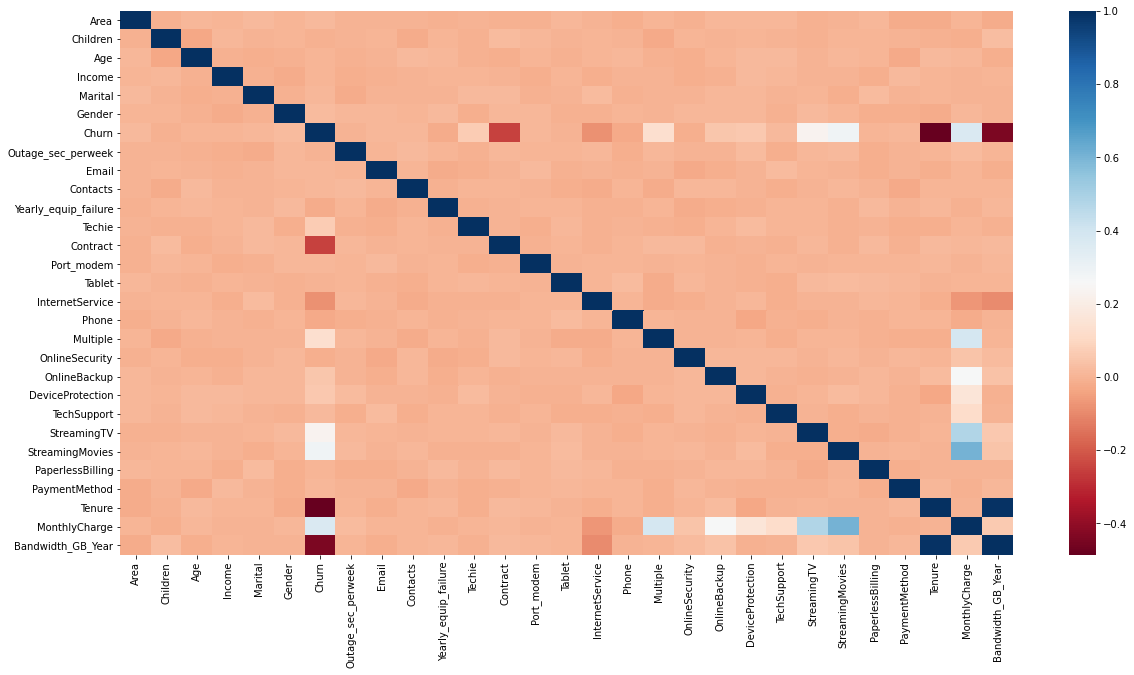

In [29]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [30]:
corr_df_before = converted_df

# Adding constant to calculate VIF
X1 = sm.tools.add_constant(corr_df_before)


# Create the series to retrieve values
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)


# Display the series
print('DATA BEFORE')
print('-'*50)
display(series_before)



DATA BEFORE
--------------------------------------------------


const                   229.088084
Area                      1.002057
Children                  1.681219
Age                       1.696588
Income                    1.002332
Marital                   1.003379
Gender                    1.097972
Churn                     1.918328
Outage_sec_perweek        1.002667
Email                     1.002728
Contacts                  1.003165
Yearly_equip_failure      1.002228
Techie                    1.009318
Contract                  1.119241
Port_modem                1.001809
Tablet                    1.003471
InternetService           6.004329
Phone                     1.003474
Multiple                  3.867539
OnlineSecurity            1.281520
OnlineBackup              2.931550
DeviceProtection          1.914319
TechSupport               1.277392
StreamingTV               9.382067
StreamingMovies          11.259293
PaperlessBilling          1.003576
PaymentMethod             1.003685
Tenure                  729.271000
MonthlyCharge       

In [31]:
#Calculating VIF again after dropping a predictor variable
corr_df_after = converted_df.drop(['Bandwidth_GB_Year'], axis = 1)

X2 = sm.tools.add_constant(corr_df_after)

series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

print('DATA AFTER')
print('-'*50)
display(series_after)

DATA AFTER
--------------------------------------------------


const                   105.126996
Area                      1.002041
Children                  1.003101
Age                       1.003711
Income                    1.002206
Marital                   1.003188
Gender                    1.003226
Churn                     1.880937
Outage_sec_perweek        1.002655
Email                     1.002728
Contacts                  1.003103
Yearly_equip_failure      1.002147
Techie                    1.009310
Contract                  1.116274
Port_modem                1.001628
Tablet                    1.003450
InternetService           1.044471
Phone                     1.003430
Multiple                  2.136929
OnlineSecurity            1.012580
OnlineBackup              1.527865
DeviceProtection          1.167725
TechSupport               1.139511
StreamingTV               2.916109
StreamingMovies           3.961557
PaperlessBilling          1.003576
PaymentMethod             1.003684
Tenure                    1.437762
MonthlyCharge       

In [32]:
# define our input variables and output variable
final_df = converted_df.drop(['Bandwidth_GB_Year'], axis = 1)

X = final_df.drop('Tenure', axis = 1)
Y = final_df[['Tenure']]

# split it into test and train variables with 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [33]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*50)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 33.79
--------------------------------------------------
The Coefficient for Area is -0.41
The Coefficient for Children is 0.021
The Coefficient for Age is 0.019
The Coefficient for Income is 1.9e-05
The Coefficient for Marital is 0.38
The Coefficient for Gender is -0.26
The Coefficient for Churn is -3.8e+01
The Coefficient for Outage_sec_perweek is -0.042
The Coefficient for Email is -0.089
The Coefficient for Contacts is 0.2
The Coefficient for Yearly_equip_failure is -0.14
The Coefficient for Techie is 2.6
The Coefficient for Contract is -4.5
The Coefficient for Port_modem is 0.79
The Coefficient for Tablet is -0.57
The Coefficient for InternetService is -2.1
The Coefficient for Phone is -0.36
The Coefficient for Multiple is 3.1
The Coefficient for OnlineSecurity is -0.76
The Coefficient for OnlineBackup is 3.0
The Coefficient for DeviceProtection is -0.15
The Coefficient for TechSupport is 0.38
The Coefficient for StreamingTV is 7.0
The Coefficient fo

In [34]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

In [35]:
# print out a summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     161.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:02:35   Log-Likelihood:                -45123.
No. Observations:               10000   AIC:                         9.030e+04
Df Residuals:                    9972   BIC:                         9.050e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   34.9868 

In [36]:
#Re training the model removing all variables with a P value over 0.05
final_df = converted_df.drop(['Bandwidth_GB_Year', 'Area', 'Children', 'Age', 'Income', 
                          'Marital', 'Gender', 'Outage_sec_perweek', 'Email', 'Contacts', 
                          'Yearly_equip_failure', 'Port_modem', 'Tablet', 'Phone', 
                          'OnlineSecurity', 'DeviceProtection', 'TechSupport', 
                          'PaperlessBilling', 'MonthlyCharge'], axis = 1)

X = final_df.drop('Tenure', axis = 1)
Y = final_df[['Tenure']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [37]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     482.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:02:35   Log-Likelihood:                -45133.
No. Observations:               10000   AIC:                         9.029e+04
Df Residuals:                    9990   BIC:                         9.036e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              36.9559      0.670     

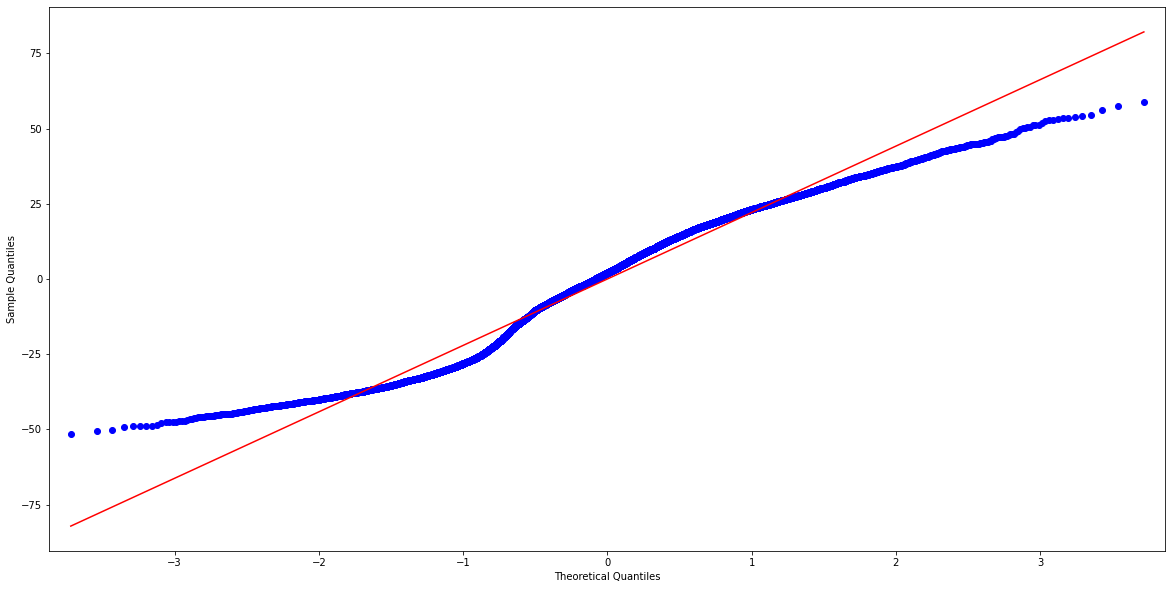

The mean of the residuals is 8.785e-14


In [38]:
import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [39]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 10 predictions
y_predict[:10]

array([[37.00428464],
       [41.1660838 ],
       [20.56281512],
       [14.47604407],
       [36.85414106],
       [37.00428464],
       [37.82256067],
       [ 5.27235755],
       [26.77656284],
       [30.92566212]])

In [40]:
#Printing the Intercept and the Coefficients
print(regression_model.intercept_)
print(regression_model.coef_)

[36.33848226]
[[-37.72917356   2.66502088  -4.4464722   -2.15888931   3.64296772
    3.34352313   7.62915581   9.49091319   0.74495714]]


In [41]:
#Predict Tenure of a random person who didn't Churn, is Techie, has a month-to-month Contract, 
#has DSL for InternetService, has Multiple lines, 
#has OnlineBackup, has StreamingTV, has StreamingMovies, and PaymentMethod is CreditCard 
predict_sample1 = regression_model.predict([[0, 1, 0, 1, 1, 1, 1, 1, 1]])
print(predict_sample1)

[[61.69613083]]


In [42]:
#Printing the result in a readable way
print('The multiple regression formula is: \n\nTenure = ',  regression_model.intercept_[0], '', 
                                                          regression_model.coef_[0][0], 'Churn +', 
                                                          regression_model.coef_[0][1], 'Techie',
                                                          regression_model.coef_[0][2], 'Contract',
                                                          regression_model.coef_[0][3], 'InternetService +',
                                                          regression_model.coef_[0][4], 'Multiple +',
                                                          regression_model.coef_[0][5], 'OnlineBackup +',
                                                          regression_model.coef_[0][6], 'StreamingTV +',
                                                          regression_model.coef_[0][7], 'StreamingMovies +',
                                                          regression_model.coef_[0][8], 'PaymentMethod')

The multiple regression formula is: 

Tenure =  36.33848226351175  -37.72917356462632 Churn + 2.6650208795000174 Techie -4.44647219735934 Contract -2.1588893130096944 InternetService + 3.6429677150095907 Multiple + 3.343523130744688 OnlineBackup + 7.62915581458135 StreamingTV + 9.490913192522067 StreamingMovies + 0.7449571435676787 PaymentMethod


In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

ValueError: continuous is not supported